<a href="https://colab.research.google.com/github/a01137646/ComputerVision/blob/main/ComputerVision/4_convolution%20/4_convolution_gerardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

# TC 4033: Visión computacional para imágenes y video

# Tecnológico de Monterrey

## Dr. Gilberto Ochoa Ruiz

# **4. Image Convolution**

## **Equipo # 16**
### Edwin David Hernández Alejandre A01794692
### Miguel Guillermo Galindo Orozco A01793695
### Jorge Pedroza Rivera A01319553
### Juan Carlos Alvarado Carricarte A01793486
### Gerardo Aaron Castañeda Jaramillo A01137646


## Table of Contents
1. [Libraries](#libraries)
2. [Simple Example](#simple)
3. [PyTorch Convolution](#pytorch)
4. [Ejercicios](#Ejercicios)
* [Ejercicio 1](#Ejercicio1)
* [Ejercicio 2](#Ejercicio2)
* [Ejercicio 3](#Ejercicio3)
5. [Referencias](#Referencias)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [334]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [290]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2

from scipy.ndimage import convolve

## Simple Convolution <a class="anchor" id="simple" ></a>

### Definition

- __I__: Image to convolve.
- __H__: filter matrix to convolve the image with.
- __J__: Result of the convolution.

The following graphics shows exemplary the mathematical operations of the convolution. The filter matrix __H__ is shifted over the input image __I__. The values 'under' the filter matrix are multiplicated with the corresponding values in __H__, summed up and writen to the result __J__. The target position is usually the position under the center of __H__.

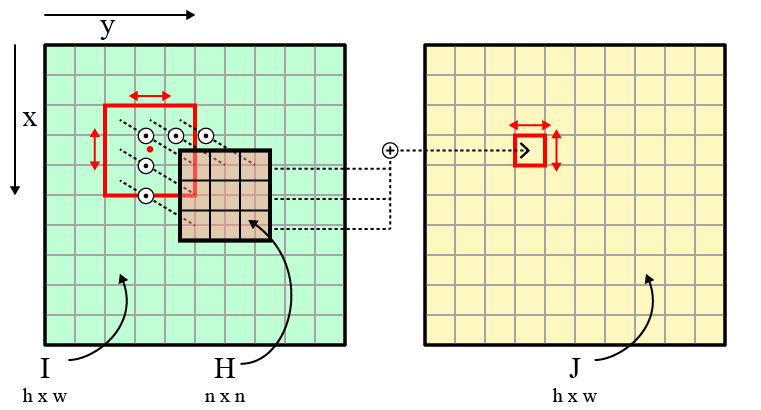

In order to implement the convolution with a block filter, we need two methods. The first one will create the block filter matrix __H__ depending on the filter width/height __n__.

A block filter holds the value $\dfrac{1}{n\cdot n}$ at each position:

In [3]:
def block_filter(n):
    H = np.ones((n, n)) / (n * n) # each element in H has the value 1/(n*n)
    return H

We will test the method by creating a filter with ``n = 5``:

In [4]:
H = block_filter(5)
print(H)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Next, we define the actual convolution operation. To prevent invalid indices at the border of the image, we introduce the padding __p__.

In [5]:
def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros

    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
    return J

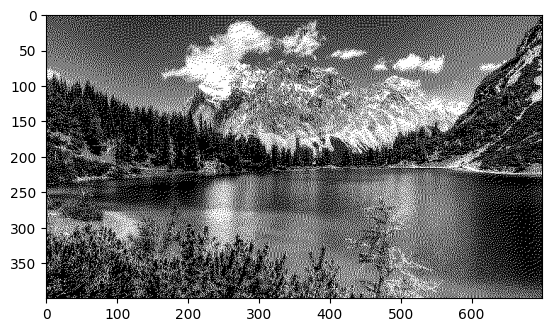

In [7]:
image = Image.open('drive/MyDrive/Vision/data/image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)

# image = np.zeros((200, 200), dtype=np.float)
# for x in range(200):
#     for y in range(200):
#         d = ((x-100)**2+(y-100)**2)**0.5
#         image[x, y] = d % 8 < 4

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [8]:
image = image.astype(float)

Next we test our implementation and apply a block filter with size 7

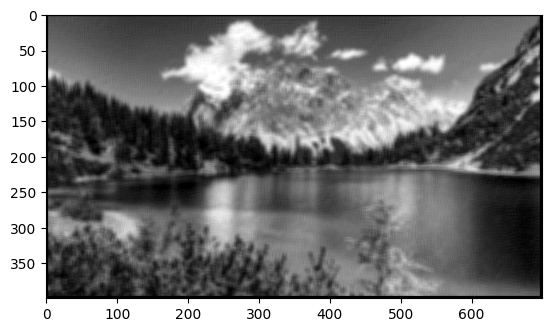

In [9]:
n = 7
H = block_filter(n)
J = apply_filter(image, H)

plt.imshow(J, cmap='gray')
plt.show()

## PyTorch Convolution <a class="anchor" id="pytorch" ></a>

In [11]:
from PIL import Image

img = Image.open('drive/MyDrive/Vision/data/image.jpg')
img.thumbnail((256,256), Image.ANTIALIAS) # Resize to half to reduce the size of this notebook.

<ipython-input-11-603ddaee3bb5>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail((256,256), Image.ANTIALIAS) # Resize to half to reduce the size of this notebook.


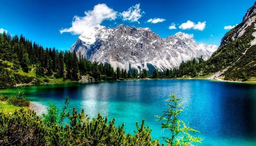

In [12]:
img

In [13]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [14]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

In [15]:

input = to_tensor(img)
input.shape


torch.Size([1, 146, 256])

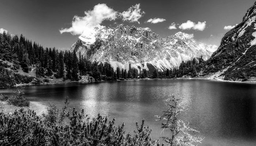

In [16]:
to_pil(input)

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3
+ `stride = 1`: the stride for the cross-correlation is 1
+ `padding = 1`: zero-paddings on both sides for 1 point for each dimension
+ `bias = False`: no bias parameter (for simplicity)

In [17]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

In [18]:
# The code below does not work because the convolution layer requires the dimension for batch.
conv(input)

tensor([[[-0.0363, -0.0489, -0.0478,  ..., -0.0655, -0.0624, -0.0342],
         [-0.0334, -0.0123, -0.0132,  ..., -0.0155, -0.0108, -0.0677],
         [-0.0344, -0.0118, -0.0120,  ..., -0.0030, -0.0293, -0.0173],
         ...,
         [-0.0351, -0.0328,  0.0236,  ..., -0.0130, -0.0157, -0.0072],
         [-0.0208,  0.0419,  0.0190,  ..., -0.0119, -0.0108, -0.0023],
         [-0.0228, -0.0568, -0.0894,  ..., -0.1621, -0.1573, -0.1583]]],
       grad_fn=<SqueezeBackward1>)

We need to insert a dimension for a batch at dim=0.

In [19]:
input = input.unsqueeze(0)
input.shape

torch.Size([1, 1, 146, 256])

In [20]:
output = conv(input)
output.shape

torch.Size([1, 1, 146, 256])

Setting `padding=1` in the convolution layer, we obtain an image of the same size.

In [21]:
output.shape

torch.Size([1, 1, 146, 256])

We need to remove the first dimension before converting to a PIL object.

In [22]:
output.data.squeeze(dim=0).shape

torch.Size([1, 146, 256])

Display the output from the convolution layer by converting `output` to a PIL object.

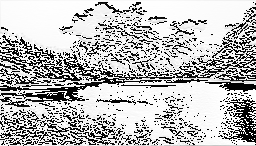

In [23]:
to_pil(output.data.squeeze(dim=0))

Clip every value in the output tensor within the range of [0, 1].

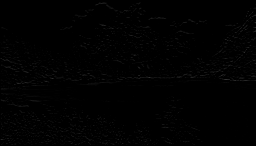

In [24]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

In [221]:
def display2(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

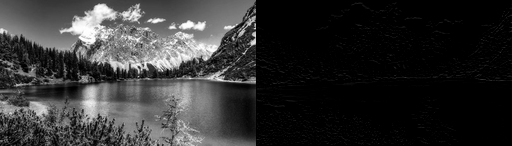

In [26]:
display2(input, output)

### Identity

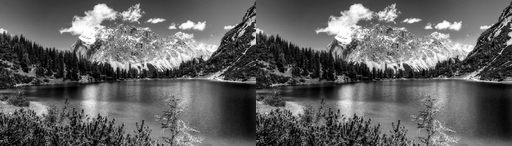

In [27]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

output = conv(input)
display2(input, output)

### Brighten

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


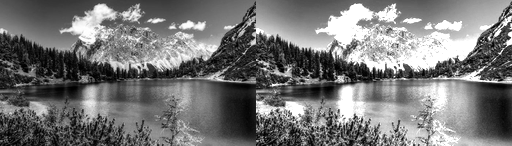

In [28]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display2(input, output)

### Darken

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


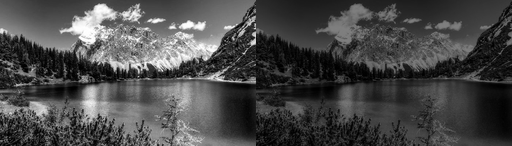

In [29]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display2(input, output)

### Box blur

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


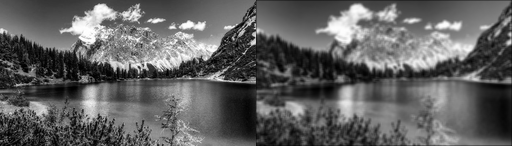

In [30]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
print(conv.weight.data)
output = conv(input)
display2(input, output)

### Gaussian blur

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])


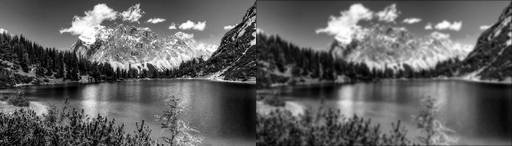

In [31]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
print(conv.weight.data)
output = conv(input)
display2(input, output)

### Sharpen

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


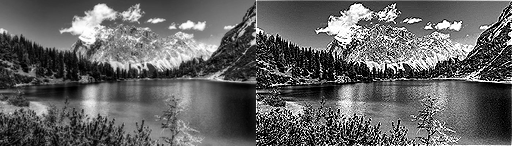

In [32]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display2(input, output)

tensor([[[[ 0., -2.,  0.],
          [-2., 10., -2.],
          [ 0., -2.,  0.]]]])


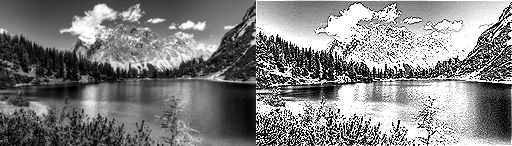

In [33]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display2(input, output)

### Edge detection

tensor([[[[ 0.,  1.,  0.],
          [ 1., -4.,  1.],
          [ 0.,  1.,  0.]]]])


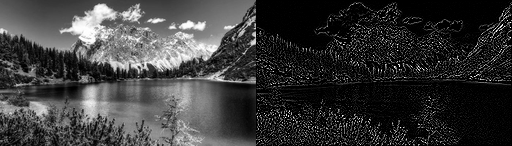

In [34]:
conv.weight.data = torch.tensor([[[
    [0., 1., 0.],
    [1., -4., 1.],
    [0., 1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display2(input, output)

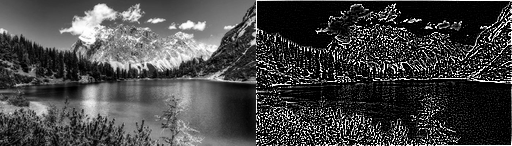

In [35]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
output = conv(input)
display2(input, output)

# **2. Ejercicios** <a class="anchor" id="Ejercicios" ></a>

In [195]:
img = Image.open('drive/MyDrive/Vision/4_convolution/data/image2.jpeg')
img.thumbnail((256, 256), Image.ANTIALIAS)
img_tensor = torch.tensor(np.array(img) / 255.0, dtype=torch.float32).permute(2, 0, 1)  # Cambiar dimensiones

<ipython-input-195-8c67cd84b00c>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail((256, 256), Image.ANTIALIAS)


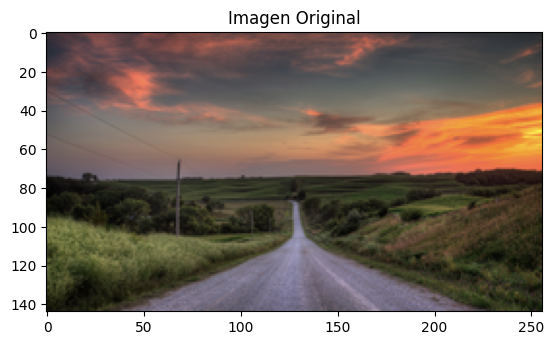

In [196]:
plt.imshow(img)
plt.title('Imagen Original')
plt.show()

## **Ejercicio 1**<a class="anchor" id="Ejercicio1" ></a>

Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

In [479]:
img = Image.open('drive/MyDrive/Vision/4_convolution/data/image2.jpeg')
img.thumbnail((512, 512), Image.ANTIALIAS)

<ipython-input-479-c10562dd2eb8>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail((512, 512), Image.ANTIALIAS)


In [480]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

img_tensor = to_tensor(img)
img_tensor.shape

torch.Size([1, 288, 512])

In [481]:
input = to_tensor(img)
input.shape

torch.Size([1, 288, 512])

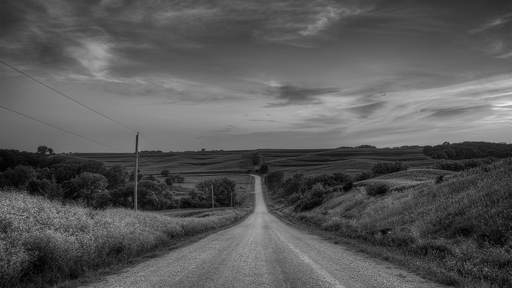

In [482]:
to_pil(input)

In [234]:
from IPython.display import display

PrewittX


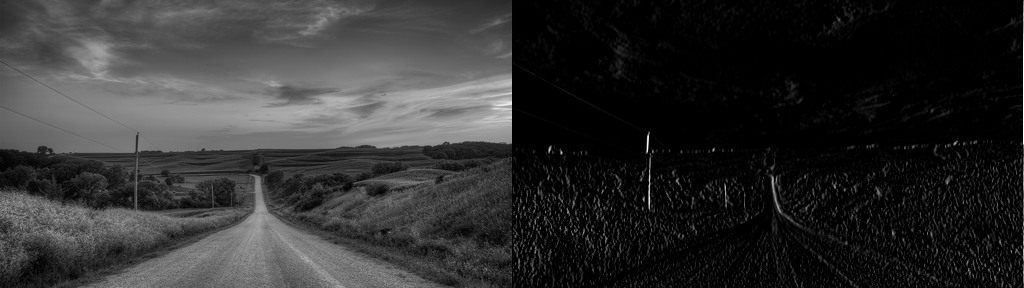

PrewittY


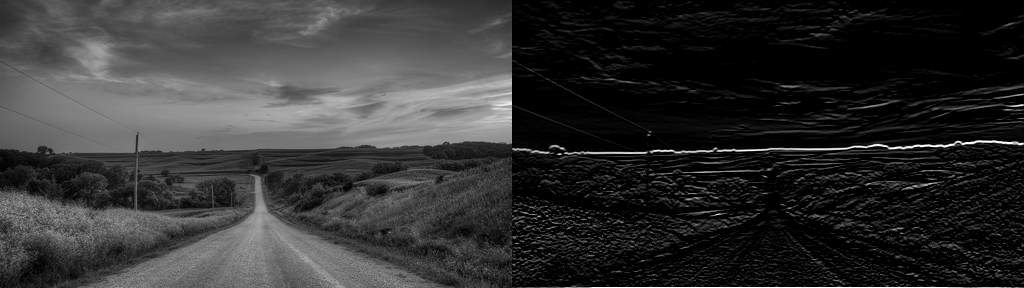

SobelX


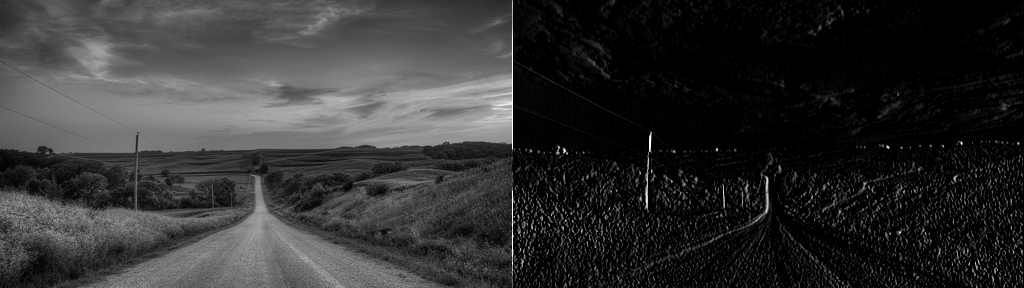

SobelY


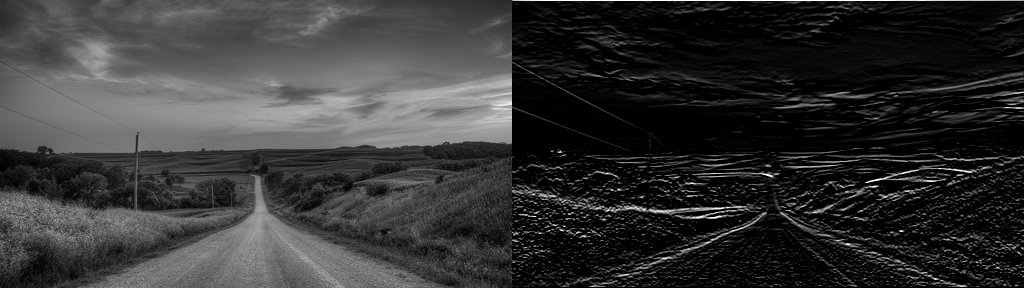

Laplaciano


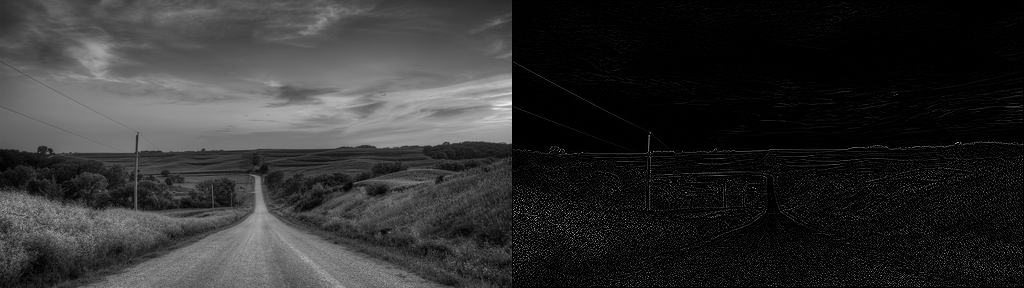

In [483]:
tensor_prewittX = [[1,0,-1],[1,0,-1],[1,0,-1]]
tensor_prewittY = [[1,1,1],[0,0,0],[-1,-1,-1]]
tensor_sobelX = [[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]
tensor_sobelY =	[[-1, -2, -1],[0, 0, 0],[1, 2, 1]]
tensor_laplaciano = [[0, 1, 0],[1, -4, 1],[0, 1, 0]]

filters_list = [tensor_prewittX,tensor_prewittY,tensor_sobelX,tensor_sobelY,tensor_laplaciano]
filters_titles = ['PrewittX','PrewittY','SobelX','SobelY',"Laplaciano"]

images_filtered = []
for i in range(len(filters_titles)):
  conv.weight.data = torch.tensor([[filters_list[i]]], dtype=torch.float32)
  images_filtered.append(conv(input))
  print(filters_titles[i])
  display(display2(input,images_filtered[i]))

**Prewitt**

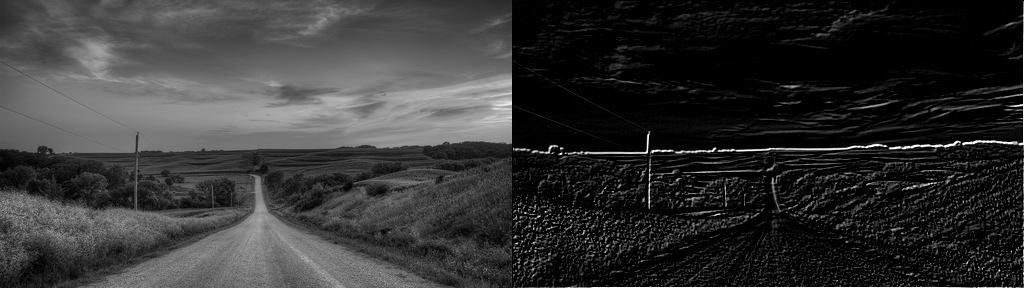

In [484]:
display2(input,images_filtered[0] + images_filtered[1])

**Sobel**

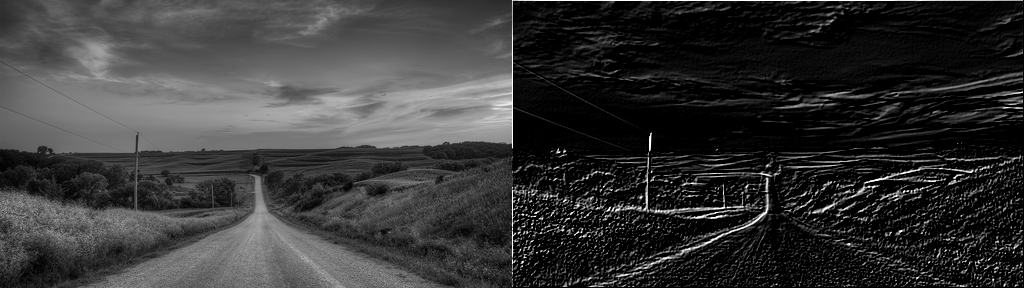

In [485]:
display2(input,images_filtered[2] + images_filtered[3])

**Laplaciano**

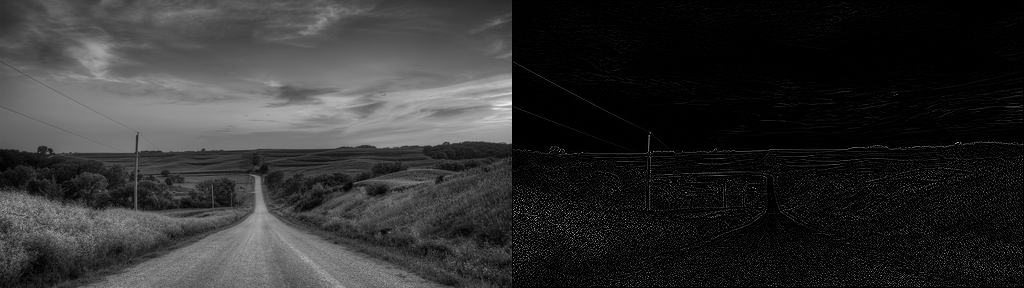

In [486]:
display2(input,images_filtered[4])

**PENDIENTE INVESTIGAR CUAL ES EL MAS EFICIENTE**

## **Ejercicio 2**<a class="anchor" id="Ejercicio2" ></a>

Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

In [500]:
def line_enchance(imagen_path, alfa):
    imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar el filtro Sobel para detectar bordes en X y Y
    sobel_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=5)

    # Calcular la magnitud del gradiente
    magnitud = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalizar la magnitud del gradiente a valores entre 0 y 255
    magnitud = cv2.normalize(magnitud, None, 0, 255, cv2.NORM_MINMAX)

    # Convertir la magnitud a tipo de datos uint8
    magnitud = np.uint8(magnitud)

    # Multiplicar los píxeles de la imagen mask por alfa
    lineas_realzadas = alfa * magnitud.astype(np.float32)

    # Restar las líneas realzadas de la imagen original
    imagen_realzada = (imagen.astype(np.float32) - lineas_realzadas).clip(0, 255).astype(np.uint8)

    plt.figure(figsize=(18, 10))
    plt.subplot(131), plt.imshow(imagen, cmap='gray'), plt.title('Imagen Original')
    plt.subplot(132), plt.imshow(lineas_realzadas, cmap='gray'), plt.title('Líneas Realzadas')
    plt.subplot(133), plt.imshow(imagen_realzada, cmap='gray'), plt.title('Imagen Realzada')
    plt.show()

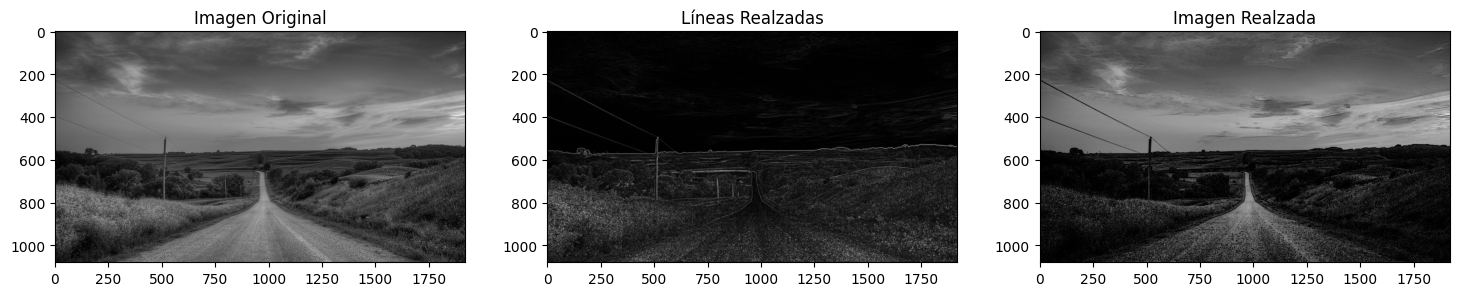

In [503]:
ruta_imagen = 'drive/MyDrive/Vision/4_convolution/data/image2.jpeg'
alfa = 1.5

line_enchance(ruta_imagen, alfa)

## **Ejercicio 3**<a class="anchor" id="Ejercicio3" ></a>

Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

In [535]:
def enhance_image_brightness_gamma_gaussian_median(image_path, brightness=50, gamma=1.5, sigma=1.0, median_kernel_size=3):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Incrementamos brillo
    brightness_image = cv2.convertScaleAbs(original_image, alpha=1, beta=brightness)

    # Aplicamos gamma correction
    gamma_corrected_image = np.uint8(cv2.pow(brightness_image / 255.0, gamma) * 255.0)

    # Aplicamos gaussian blur
    smoothed_image = cv2.GaussianBlur(gamma_corrected_image, (0, 0), sigmaX=sigma, sigmaY=sigma)

    # Aplicamos median filter
    median_filtered_image = cv2.medianBlur(smoothed_image, median_kernel_size)

    # Desplegamos las imagenes
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 5, 2)
    plt.imshow(brightness_image, cmap='gray')
    plt.title(f'Brightness Increase (Beta={brightness})')
    plt.subplot(1, 5, 3)
    plt.imshow(gamma_corrected_image, cmap='gray')
    plt.title(f'Gamma Correction (Gamma={gamma})')
    plt.subplot(1, 5, 4)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title(f'Gaussian Smoothing (Sigma={sigma})')
    plt.subplot(1, 5, 5)
    plt.imshow(median_filtered_image, cmap='gray')
    plt.title(f'Median Filter (Kernel Size={median_kernel_size})')
    plt.show()

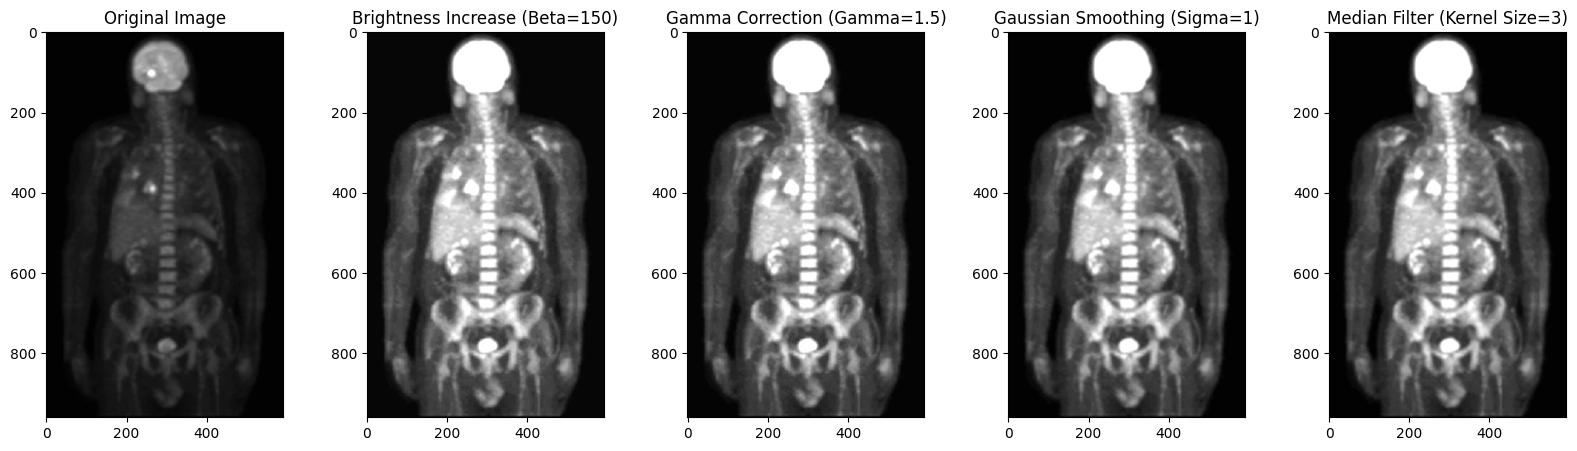

In [548]:
image_path = 'drive/MyDrive/Vision/4_convolution/data/image3.jpg'

enhance_image_brightness_gamma_gaussian_median(image_path, 150, 1.5, 1, 3)

# **3. Referencias** <a class="anchor" id="Referencias" ></a>